In [6]:
import os
import sys

# Set the working directory to the project root
os.chdir('G:/Projects/Satelite-Predictive-Algorithim')

# Add the project root to sys.path for module imports
sys.path.append(os.getcwd())

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from utils.preprocessing import load_and_preprocess_image

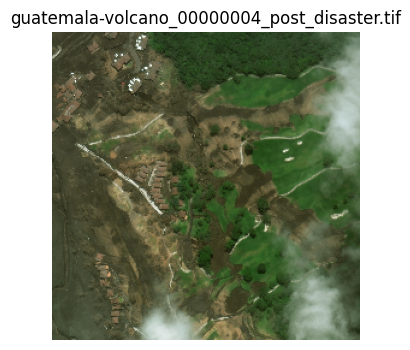

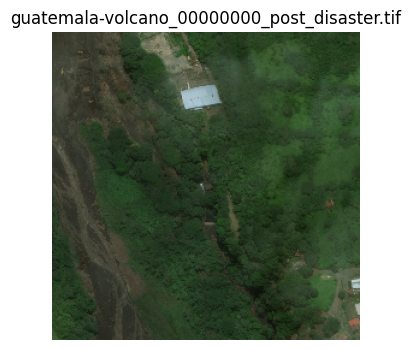

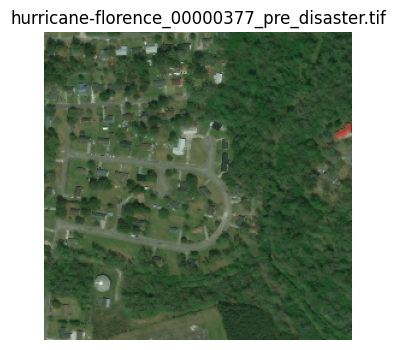

In [8]:
# Define paths to a few sample images
sample_images = [
    'data/cleaned/Hold/images/guatemala-volcano_00000004_post_disaster.tif',
    'data/cleaned/Tier1/images/guatemala-volcano_00000000_post_disaster.tif',
    'data/cleaned/Test/images/hurricane-florence_00000377_pre_disaster.tif'
]

# Display each image
for img_path in sample_images:
    img = load_and_preprocess_image(img_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')
    plt.show()

In [11]:
import json
from collections import Counter

# Path to a sample label file
label_file = 'data/cleaned/Hold/labels/guatemala-volcano_00000004_post_disaster.json'

with open(label_file, 'r') as f:
    data = json.load(f)

# Extract the "subtype" from each feature within 'lng_lat'
subtypes = [feature['properties']['subtype'] for feature in data['features']['lng_lat']]

# Print extracted subtypes to check structure
print(subtypes)


['major-damage', 'major-damage', 'major-damage', 'major-damage', 'major-damage', 'destroyed', 'major-damage', 'minor-damage', 'minor-damage', 'minor-damage', 'minor-damage', 'destroyed', 'minor-damage', 'no-damage', 'no-damage', 'minor-damage', 'destroyed', 'major-damage', 'major-damage', 'destroyed']


In [12]:
# Define augmentation pipeline with detailed transformations
datagen = ImageDataGenerator(
    rotation_range=30,           # Rotate images randomly up to 30 degrees
    width_shift_range=0.1,       # Shift images horizontally by up to 10%
    height_shift_range=0.1,      # Shift images vertically by up to 10%
    zoom_range=0.2,              # Apply zoom transformations up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    vertical_flip=True,          # Randomly flip images vertically
    fill_mode='nearest'          # Fill in empty pixels after transformation
)

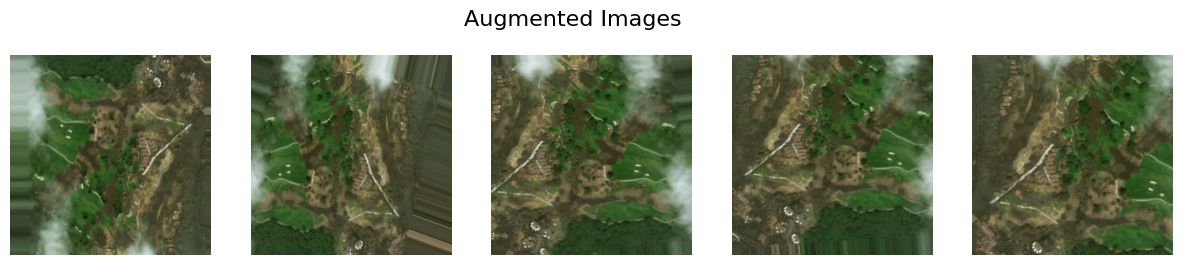

In [15]:
# Load a sample image from the "Hold" folder
img = load_and_preprocess_image('data/cleaned/Hold/images/guatemala-volcano_00000004_post_disaster.tif')
img_batch = np.expand_dims(img, axis=0)

# Create an iterator for the augmented images
aug_iter = datagen.flow(img_batch, batch_size=1)

# Plot 5 augmented images
plt.figure(figsize=(15, 3))
for i in range(5):
    batch = next(aug_iter)
    # Ensure proper display: if needed, convert the float image back to uint8 for visualization
    augmented_img = (batch[0] * 255).astype(np.uint8)
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_img)
    plt.axis('off')
plt.suptitle('Augmented Images', fontsize=16)
plt.show()